OpenCV
===

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('calibration_wide/GOPR0032.jpg')
img_size = (img.shape[1], img.shape[0])

nx = 8  # the number of inside corners in x
ny = 6  # the number of inside corners in y

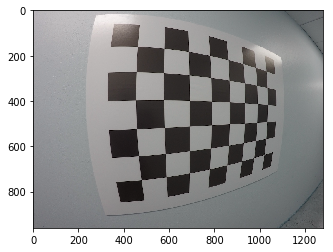

In [3]:
# %matplotlib qt
plt.imshow(img)

In [4]:
%matplotlib inline

In [5]:
objp = np.zeros((ny * nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, add object points, image points
if ret == True:
    objpoints.append(objp)
    imgpoints.append(corners)

    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

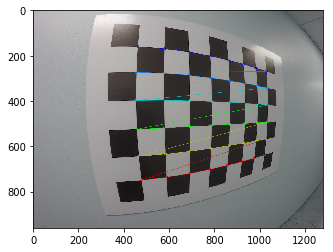

In [7]:
plt.imshow(img)

In [8]:
print(ret)
print(corners[0])

True
[[ 462.56225586  161.33686829]]


In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

img2 = cv2.undistort(img, mtx, dist, None, mtx)

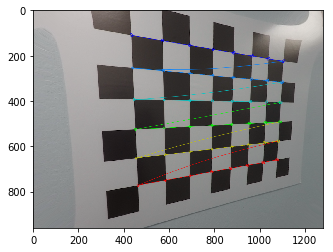

In [10]:
plt.imshow(img2)

In [11]:
src_top_left = -1
src_top_right = -1
src_bottom_right = -1
src_bottom_left = -1

if corners is not None:
    src_top_right = corners[nx - 1][0]
    src_bottom_right = corners[ny * nx - 1][0]
    src_bottom_left = corners[ny * nx - nx][0]
    src_top_left = corners[0][0]

print(src_top_left)

[ 462.56225586  161.33686829]


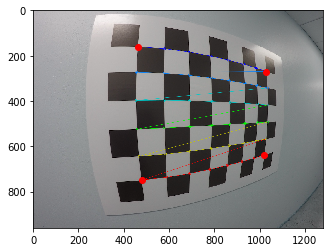

In [12]:
plt.imshow(img)
plt.plot(*src_top_left, 'ro')
plt.plot(*src_top_right, 'ro')
plt.plot(*src_bottom_right, 'ro')
plt.plot(*src_bottom_left, 'ro')

In [13]:
src = np.float32([src_top_left, src_top_right, src_bottom_right, src_bottom_left])

In [14]:
h, w = img.shape[:2]

In [15]:
offset = 120

trg_top_left = [offset, offset]
trg_top_right = [w - offset, offset]
trg_bottom_right = [w - offset, h - offset]
trg_bottom_left = [offset, h - offset]

In [16]:
trg = np.float32([trg_top_left, trg_top_right, trg_bottom_right, trg_bottom_left])

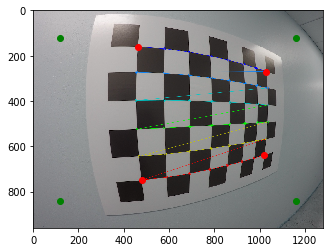

In [25]:
plt.imshow(img)
plt.plot(*trg_top_left, 'go')
plt.plot(*trg_top_right, 'go')
plt.plot(*trg_bottom_right, 'go')
plt.plot(*trg_bottom_left, 'go')

plt.plot(*src_top_left, 'ro')
plt.plot(*src_top_right, 'ro')
plt.plot(*src_bottom_right, 'ro')
plt.plot(*src_bottom_left, 'ro')

In [18]:
M = cv2.getPerspectiveTransform(src, trg)

In [19]:
warped = cv2.warpPerspective(img2, M, (w, h), flags=cv2.INTER_LINEAR)

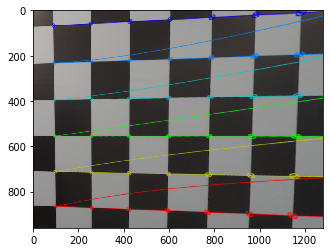

In [20]:
plt.imshow(warped)